Enter here

<h1>Forecasting number of Air Passengers for next 1 years</h1>

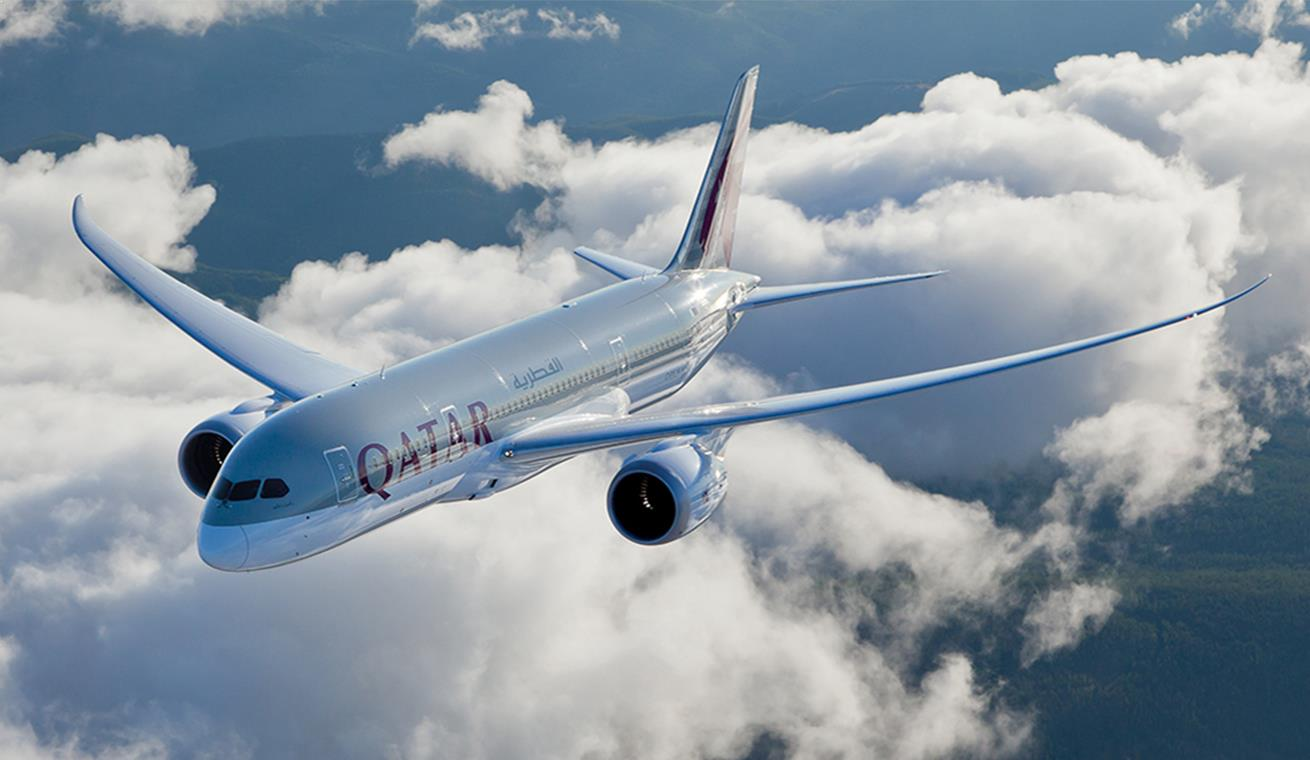

- Importing all the required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Reading the dataset file and checking the size of file

In [2]:
data=pd.read_csv(r'Data\tarakpur.csv')
data.shape

(394, 2)

In [3]:
WINDOW_SIZE = 14

- Creating the 'Date' as Index for data and viewing the dataset

In [4]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
data=data.set_index(['date'])
print(data.head())
print(data.tail())

            weight
date              
2020-02-01    2777
2020-02-02    2693
2020-02-03    3806
2020-02-04    4820
2020-02-05    4620
            weight
date              
2021-02-24    2350
2021-02-25    3228
2021-02-26    4464
2021-02-27    3133
2021-02-28    2833


- Visualizing the Time Series plot for the number of Air Passengers 

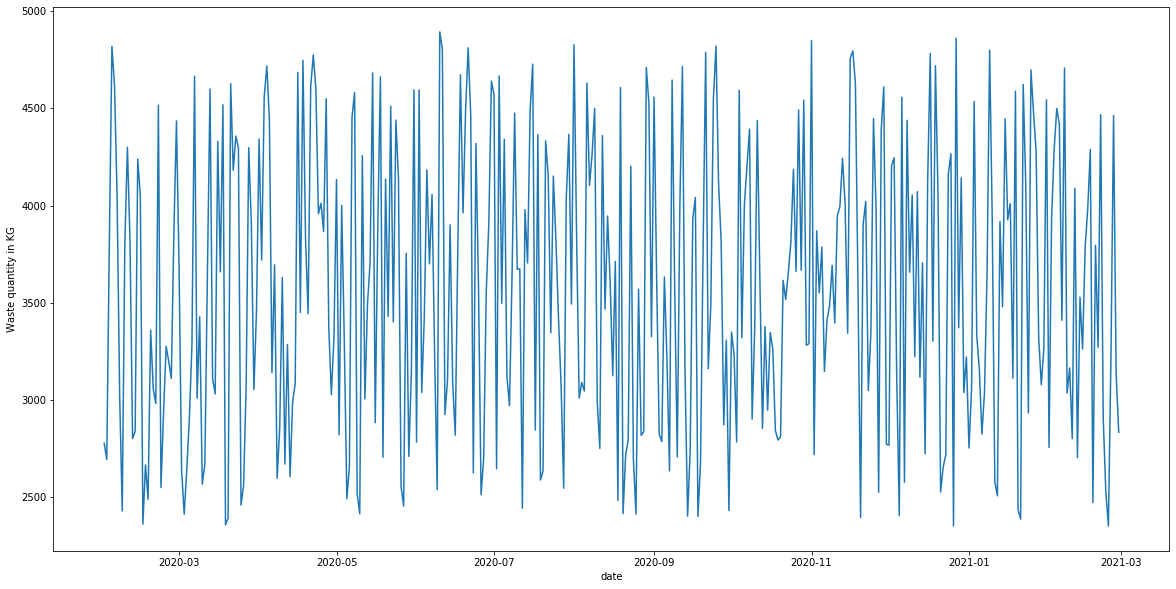

In [5]:
plt.figure(figsize=(20,10))
plt.xlabel("date")
plt.ylabel("Waste quantity in KG")
plt.plot(data)

- As we know that, A stationary Time Series is one which characteristics like mean and variance does not change over time
- Preparing the data for analyzing the Rolling Mean and Standard Deviation to check stationarity for given Time Series

In [6]:
rolmean=data.rolling(window=WINDOW_SIZE).mean()
rolstd=data.rolling(window=WINDOW_SIZE).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 weight
date                   
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
2020-02-05          NaN
2020-02-06          NaN
2020-02-07          NaN
2020-02-08          NaN
2020-02-09          NaN
2020-02-10          NaN
2020-02-11          NaN
2020-02-12          NaN
2020-02-13          NaN
2020-02-14  3573.142857
2020-02-15  3664.071429
                weight
date                  
2020-02-01         NaN
2020-02-02         NaN
2020-02-03         NaN
2020-02-04         NaN
2020-02-05         NaN
2020-02-06         NaN
2020-02-07         NaN
2020-02-08         NaN
2020-02-09         NaN
2020-02-10         NaN
2020-02-11         NaN
2020-02-12         NaN
2020-02-13         NaN
2020-02-14  793.689617
2020-02-15  767.967293


- Plotting the Rolling Mean and Standard Deviation, which has window of 12
- By looking below plot, we conclude that, it is non-stationary bcoz mean and variance is not constant

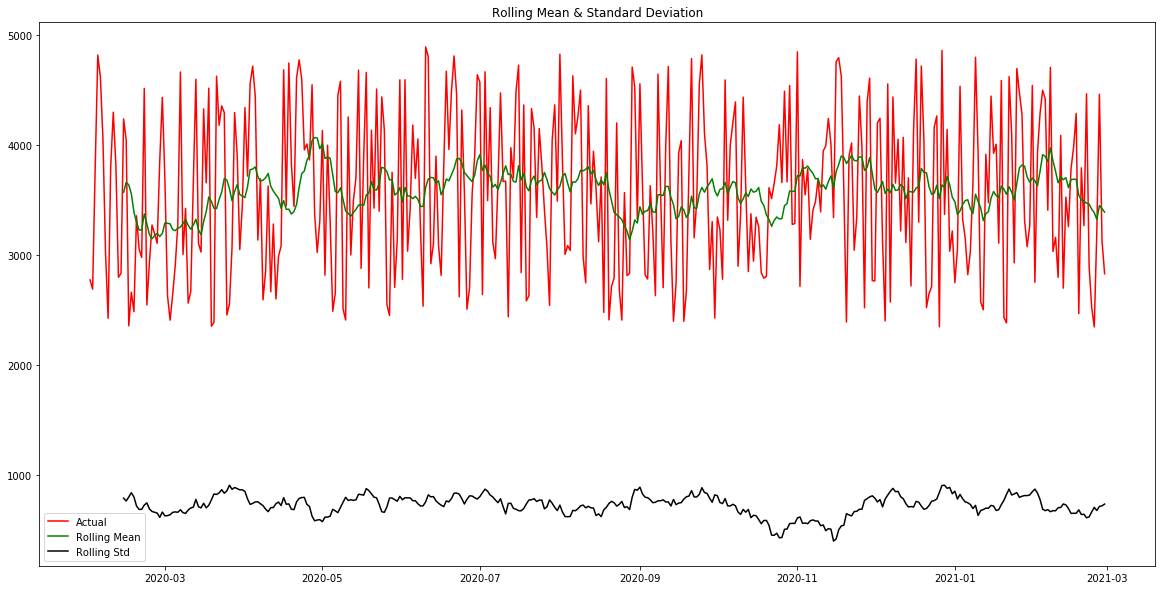

In [7]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

- Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.
- ADF has : 
<b>Null hypothesis         - Time Series is non-stationary</b>

In [8]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['weight'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -1.503074e+01
p-value                 9.911495e-28
Lags Used               1.000000e+00
No. of Obs              3.920000e+02
Critical Value (1%)    -3.447142e+00
Critical Value (5%)    -2.868941e+00
Critical Value (10%)   -2.570713e+00
dtype: float64


- From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

- Below we took log transformation to make our Time series stationary and plotted visual for it
- We found graph upward trending over time with seasonality 

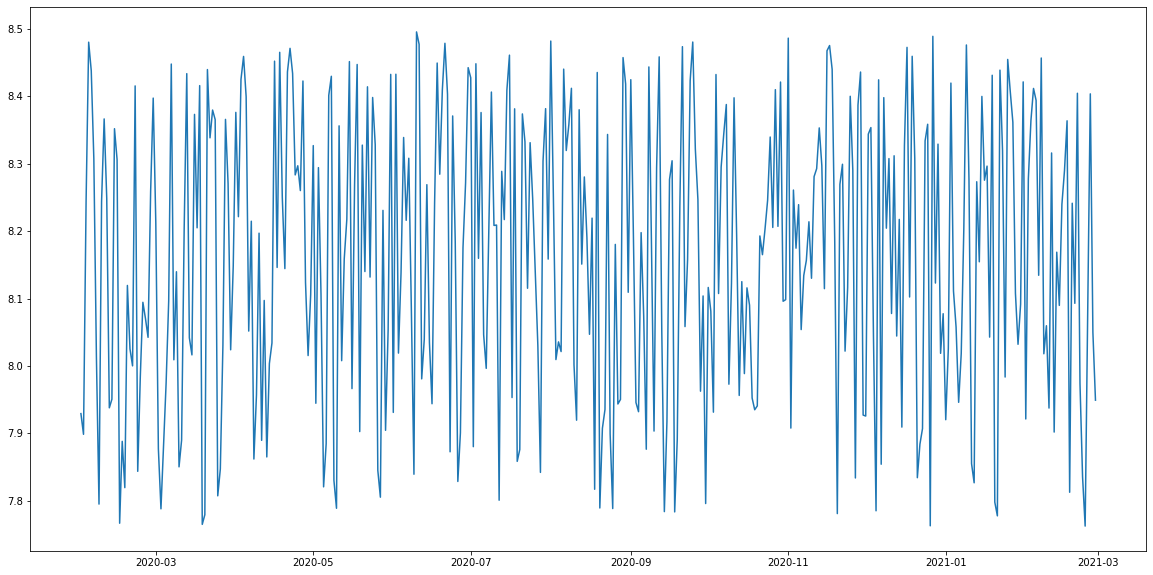

In [9]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

- Testing Rolling Mean with window 12 on above log transformation and concluded non-stationary, again

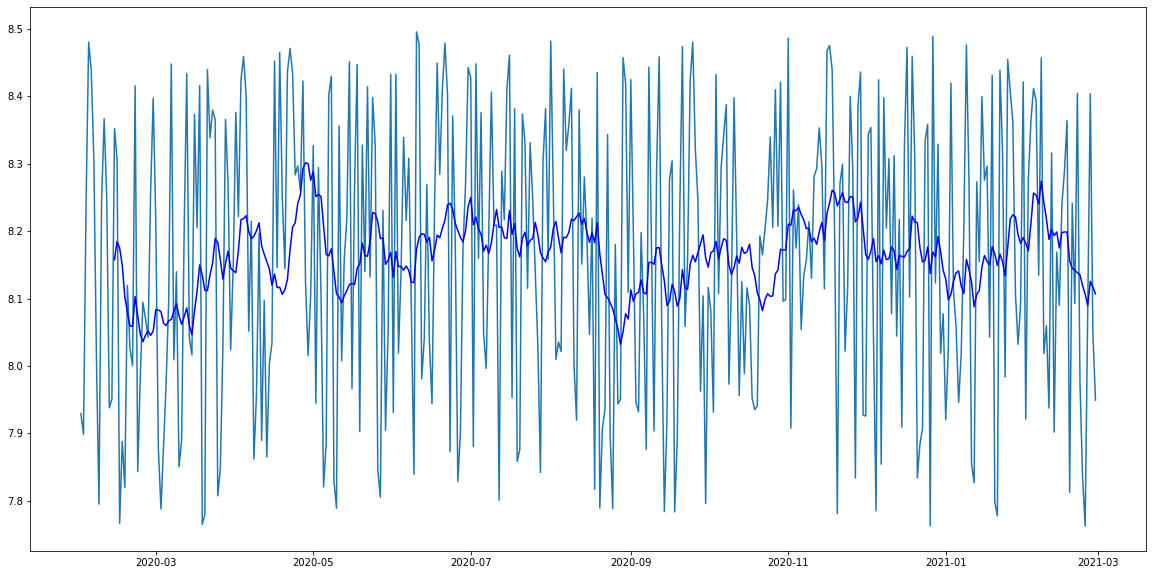

In [10]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=WINDOW_SIZE).mean()
MStd=data_log.rolling(window=WINDOW_SIZE).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

- Using another method differencing, to make our time series stationary

In [11]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

weight
date              
2020-02-01     NaN
2020-02-02     NaN
2020-02-03     NaN
2020-02-04     NaN
2020-02-05     NaN
2020-02-06     NaN
2020-02-07     NaN
2020-02-08     NaN
2020-02-09     NaN
2020-02-10     NaN
2020-02-11     NaN
2020-02-12     NaN

- Output of differencing method, after dropping null values

In [12]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

weight
date                
2020-02-14  0.194538
2020-02-15  0.121974
2020-02-16 -0.408653
2020-02-17 -0.261655
2020-02-18 -0.283145

- Defining function for Rolling Mean and Standard Deviation & ADF test

In [13]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['weight'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

- Checking the stationarity of differenced data
- From Rolling method, we see that Mean and standard deviation is not varying.
- From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance level)
- Applying all the transformation and methods, our differenced data is now stationary

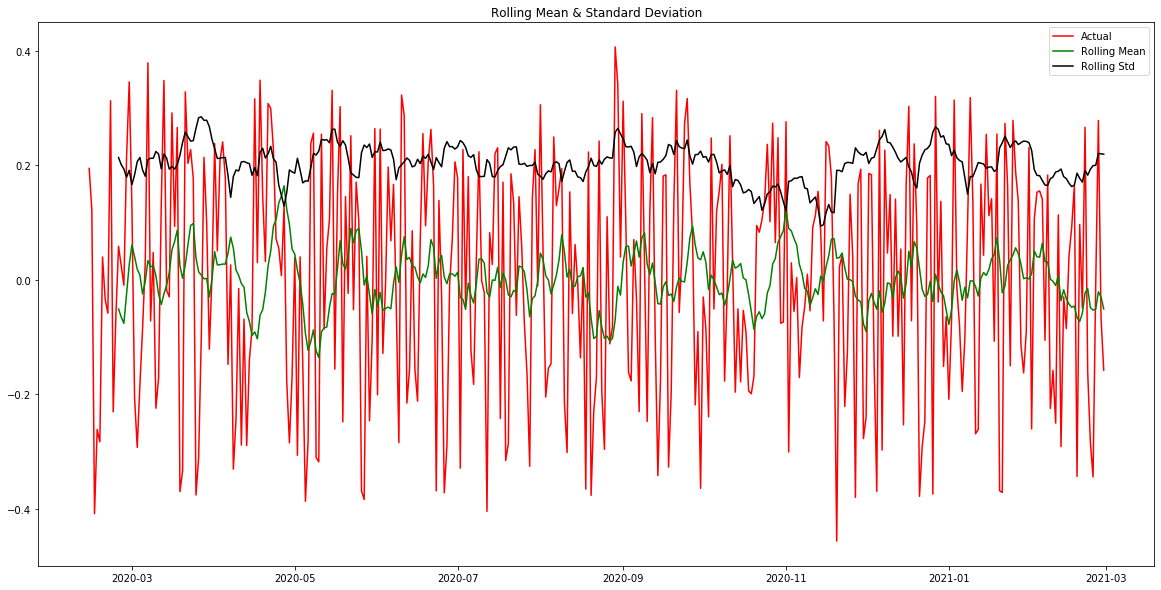

Dickey-Fuller Test: 
Test Statistic         -6.636606e+00
p-value                 5.542381e-09
Lags Used               1.700000e+01
No. of Obs              3.630000e+02
Critical Value (1%)    -3.448494e+00
Critical Value (5%)    -2.869535e+00
Critical Value (10%)   -2.571029e+00
dtype: float64


In [14]:
stationarity(data_log_diff)

- Checking for Trend stationarity and performing exponential transformation on our data

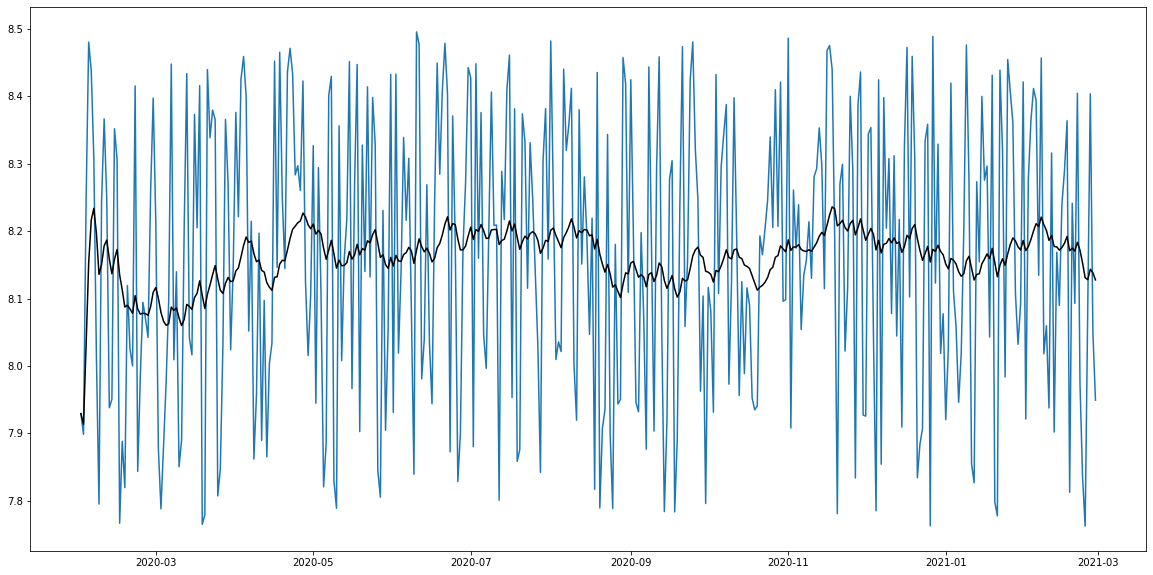

In [15]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

- Since log transformation is non-stationary, applying differencing on our data.

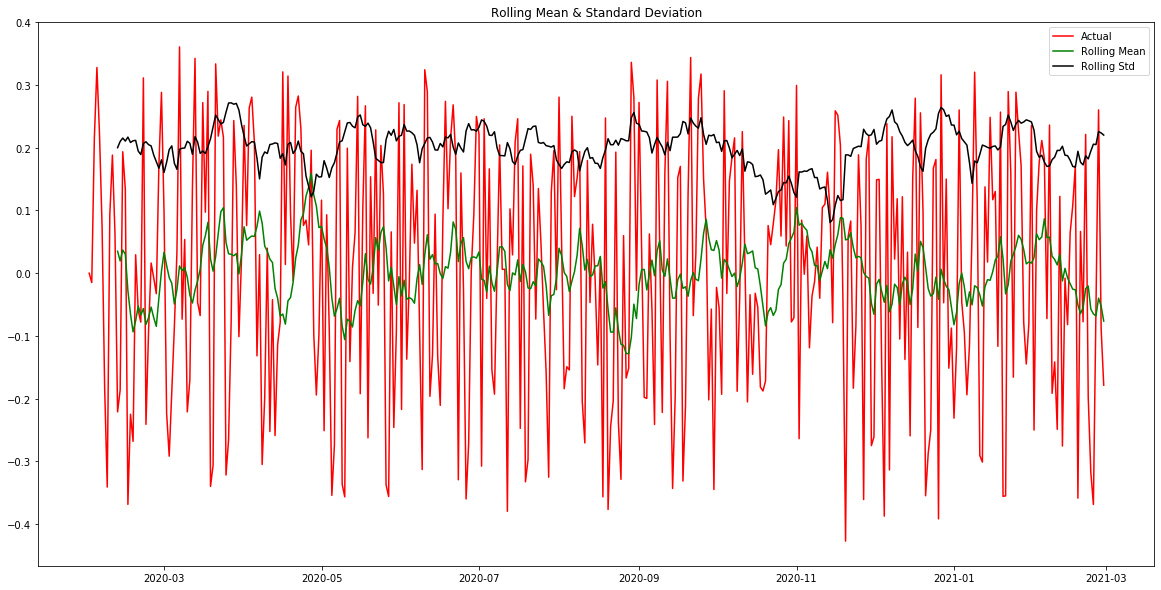

Dickey-Fuller Test: 
Test Statistic         -1.549366e+01
p-value                 2.466347e-28
Lags Used               1.000000e+00
No. of Obs              3.920000e+02
Critical Value (1%)    -3.447142e+00
Critical Value (5%)    -2.868941e+00
Critical Value (10%)   -2.570713e+00
dtype: float64


In [16]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

- From above graph and ADF test, we conclude, it is trend stationary

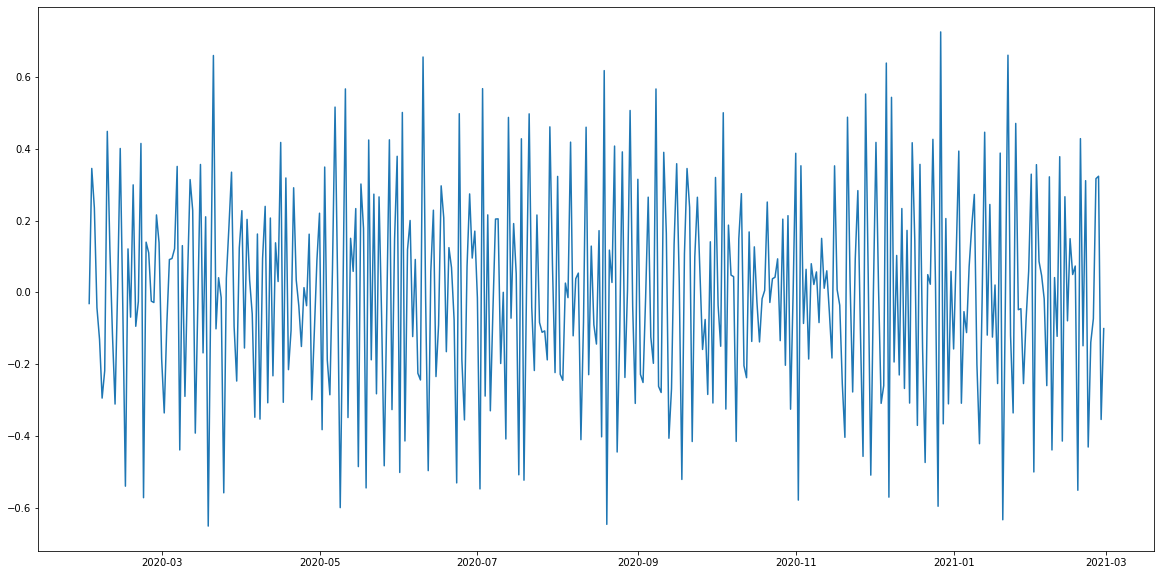

In [17]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

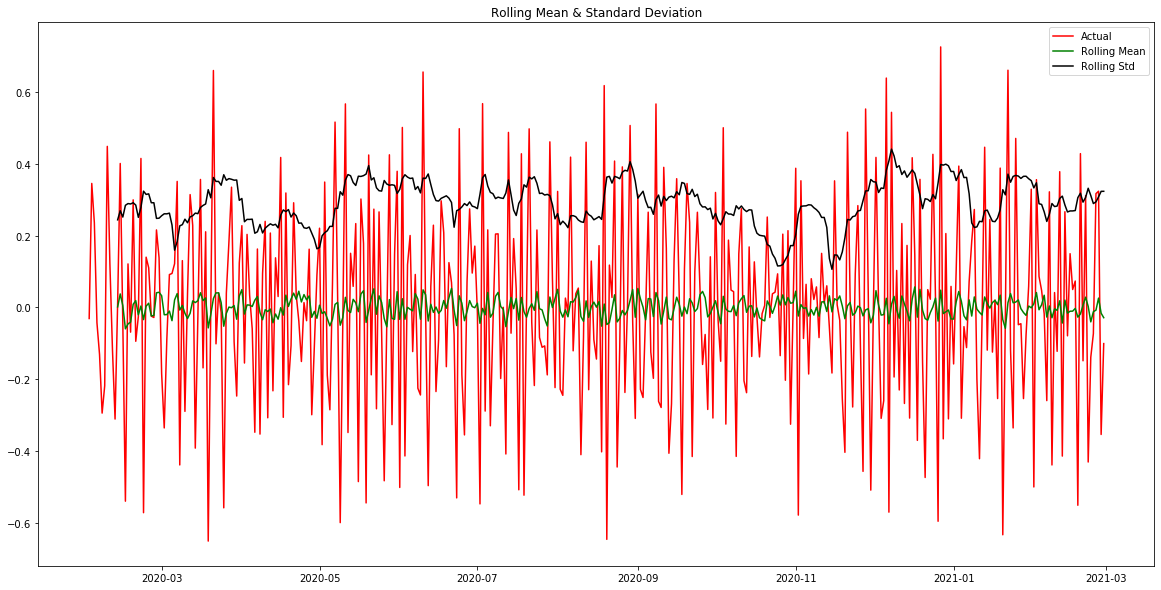

Dickey-Fuller Test: 
Test Statistic         -9.874842e+00
p-value                 3.907264e-17
Lags Used               1.500000e+01
No. of Obs              3.770000e+02
Critical Value (1%)    -3.447815e+00
Critical Value (5%)    -2.869237e+00
Critical Value (10%)   -2.570870e+00
dtype: float64


In [18]:
data_shift=data_shift.dropna()
stationarity(data_shift)

- Decomposing Time Series into its components : Trend, Seasonality and Residual

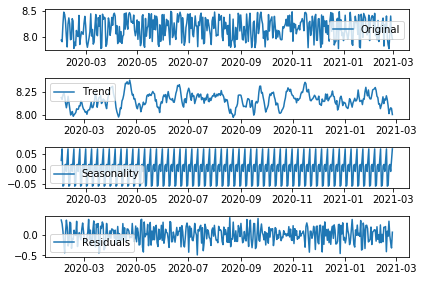

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

- Checking the stationarity of Time Series components

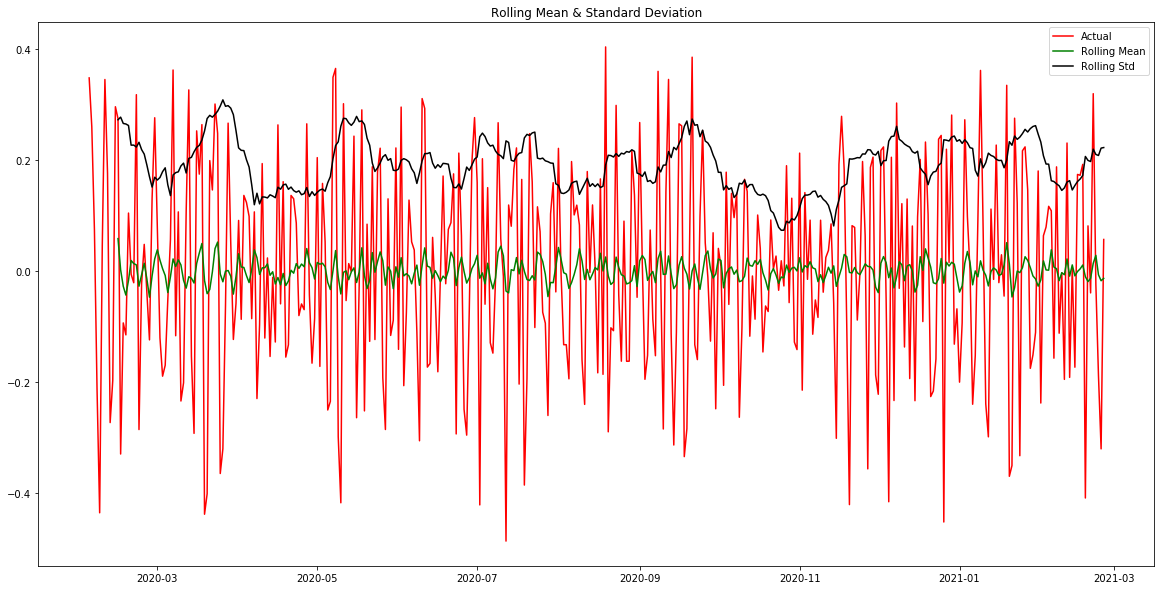

Dickey-Fuller Test: 
Test Statistic         -9.442865e+00
p-value                 4.842008e-16
Lags Used               1.700000e+01
No. of Obs              3.700000e+02
Critical Value (1%)    -3.448148e+00
Critical Value (5%)    -2.869383e+00
Critical Value (10%)   -2.570948e+00
dtype: float64


In [20]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

- Plotting the ACF and PACF to find q and p value
- We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

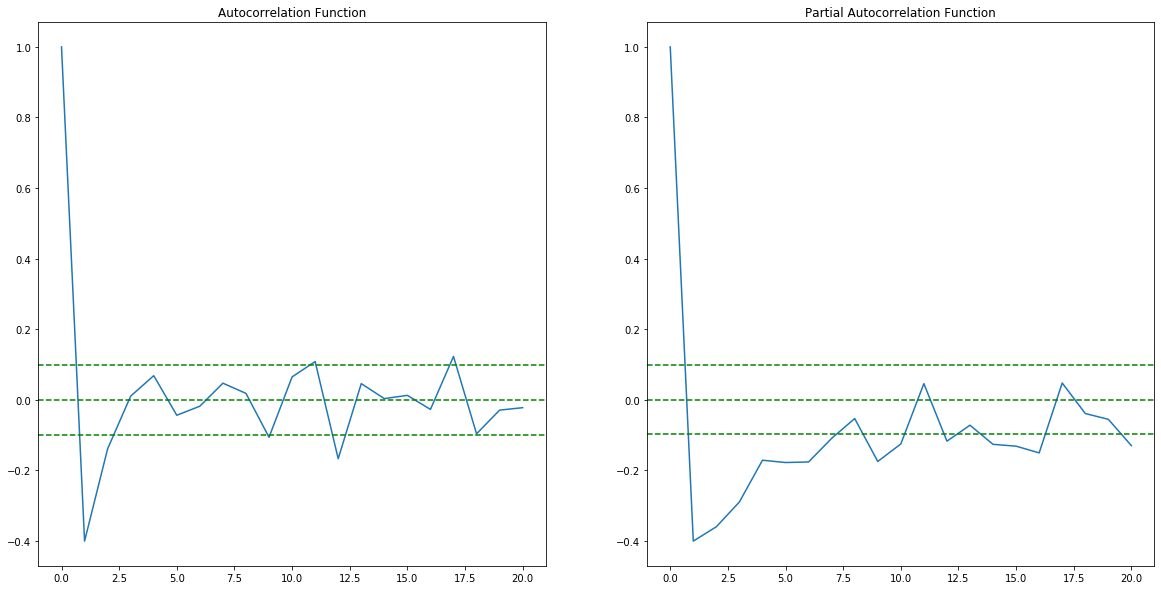

In [21]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

- Building the ARIMA model with p=2, q=2 and I=1

D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\SYSTEM\Programs\Anacodna\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


plotting ARIMA model


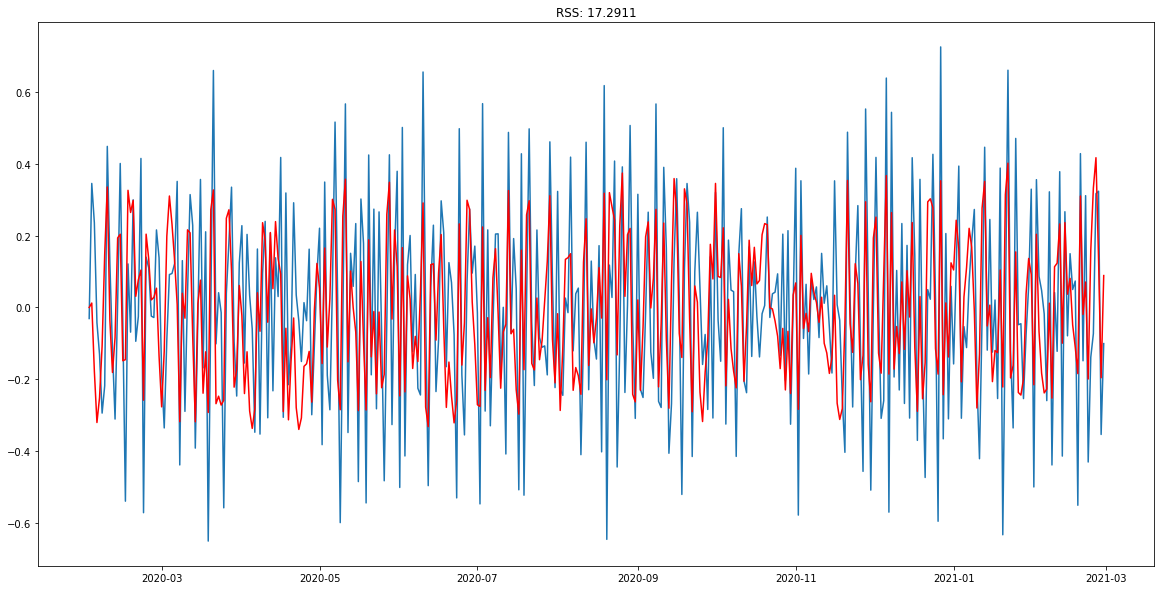

In [22]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(data_log, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['weight'])**2))
print('plotting ARIMA model')

- Predicted values from ARIMA model in difference form

In [23]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

date
2020-02-02    0.000063
2020-02-03    0.012382
2020-02-04   -0.177507
2020-02-05   -0.320677
2020-02-06   -0.251489
dtype: float64


- Performing Inverse Transformation for differencing, by doing cumulative sum

In [24]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())

date
2020-02-02    0.000063
2020-02-03    0.012446
2020-02-04   -0.165061
2020-02-05   -0.485738
2020-02-06   -0.737227
dtype: float64


- Below is data display of predicted value in log scale

In [25]:
predictions_log=pd.Series(data_log['weight'].ix[0], index=data_log.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()

date
2020-02-01    7.929126
2020-02-02    7.929190
2020-02-03    7.941572
2020-02-04    7.764065
2020-02-05    7.443389
dtype: float64

Taking out log transformation and visualizing actual vs predicted value graph

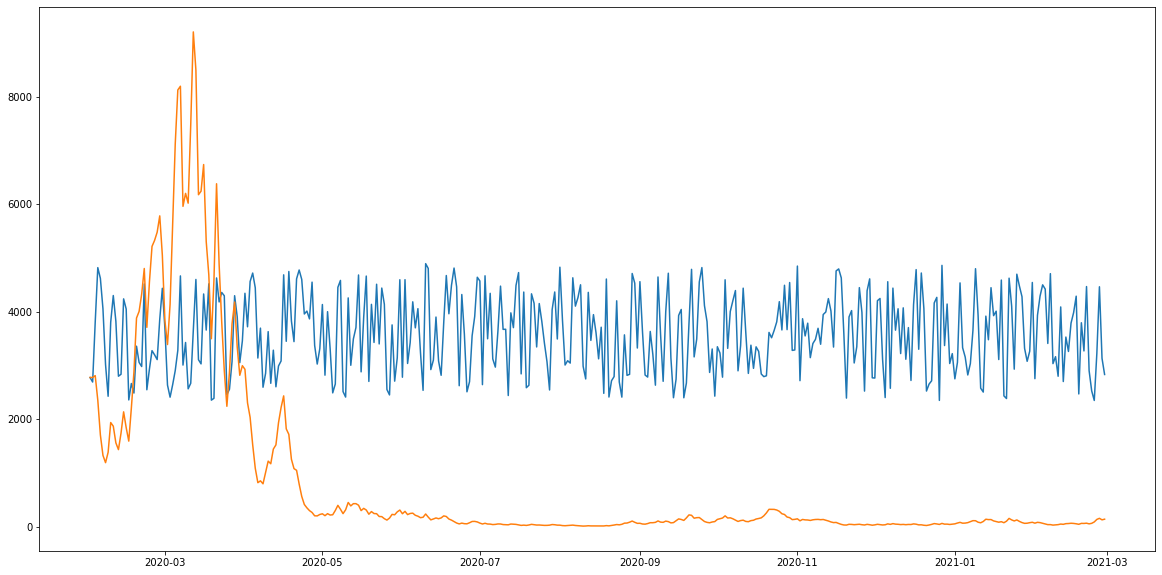

In [26]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(predictions_ARIMA)

- Plotting the visual for forecast of next 10 years with 95% confidence interval

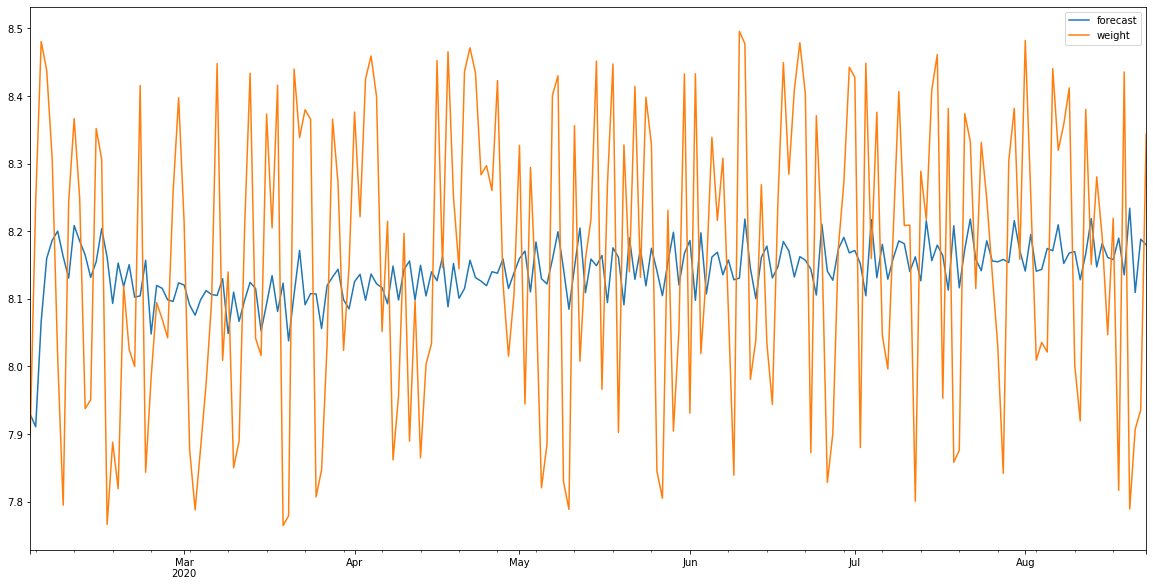

In [27]:
rcParams['figure.figsize']=20,10
results.plot_predict(1,204)
x=results.forecast(steps=120)

- Next 10 years predicted value on log scale

In [28]:
x[0]

array([8.16857452, 8.20072902, 8.17922348, 8.17246221, 8.17413292,
       8.17523127, 8.17524844, 8.17518247, 8.17523326, 8.17531024,
       8.17537702, 8.17543926, 8.17550207, 8.17556551, 8.17562897,
       8.17569235, 8.17575573, 8.1758191 , 8.17588249, 8.17594587,
       8.17600925, 8.17607263, 8.17613601, 8.17619939, 8.17626277,
       8.17632615, 8.17638953, 8.17645291, 8.1765163 , 8.17657968,
       8.17664306, 8.17670644, 8.17676982, 8.1768332 , 8.17689658,
       8.17695996, 8.17702334, 8.17708672, 8.1771501 , 8.17721349,
       8.17727687, 8.17734025, 8.17740363, 8.17746701, 8.17753039,
       8.17759377, 8.17765715, 8.17772053, 8.17778391, 8.17784729,
       8.17791068, 8.17797406, 8.17803744, 8.17810082, 8.1781642 ,
       8.17822758, 8.17829096, 8.17835434, 8.17841772, 8.1784811 ,
       8.17854448, 8.17860787, 8.17867125, 8.17873463, 8.17879801,
       8.17886139, 8.17892477, 8.17898815, 8.17905153, 8.17911491,
       8.17917829, 8.17924168, 8.17930506, 8.17936844, 8.17943

- Actual predicted value for next 10 years, after taking out log transformation

In [29]:
np.exp(x[0])

array([3528.31085338, 3643.60559658, 3566.08445487, 3542.05450445,
       3547.97721176, 3551.87627933, 3551.93724102, 3551.70293154,
       3551.88333579, 3552.15677213, 3552.39397946, 3552.61508947,
       3552.83826613, 3553.0636572 , 3553.2891263 , 3553.51435731,
       3553.73955976, 3553.96480046, 3554.19006388, 3554.41533991,
       3554.64062898, 3554.86593236, 3555.09125017, 3555.31658228,
       3555.54192865, 3555.7672893 , 3555.99266424, 3556.21805346,
       3556.44345697, 3556.66887477, 3556.89430685, 3557.11975323,
       3557.34521389, 3557.57068884, 3557.79617808, 3558.02168162,
       3558.24719945, 3558.47273157, 3558.69827799, 3558.9238387 ,
       3559.14941371, 3559.37500302, 3559.60060662, 3559.82622453,
       3560.05185674, 3560.27750324, 3560.50316405, 3560.72883916,
       3560.95452858, 3561.1802323 , 3561.40595033, 3561.63168266,
       3561.8574293 , 3562.08319025, 3562.30896551, 3562.53475508,
       3562.76055896, 3562.98637715, 3563.21220966, 3563.43805

<b>*************************End****************************</b>